### 데이터 준비하기 - **exchange.csv**

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from encodings import euc_kr
import seaborn as sns

exchange = pd.read_csv('./exchange_train.csv',encoding = 'utf_8')
kospi = pd.read_csv('./kospi_train.csv',encoding = 'utf_8')
kospi_date = kospi[['날짜']]

exchange = exchange.merge(kospi_date,how = 'inner',on = '날짜')

In [916]:
# 시각화를 위한 준비

import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

# 이상치 처리하기

## exchange

In [935]:
exchange = pd.read_csv('./data/exchange.csv',encoding = 'euc-kr')
exchange

,날짜,USD,EUR,CNY,JPY,GBP
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33
5,2001-01-09,1264.6,1196.69,152.77,1088.67,1892.98
6,2001-01-10,1257.9,1187.39,151.97,1074.67,1873.01
7,2001-01-11,1261.6,1181.93,152.42,1083.57,1876.19
8,2001-01-12,1276.6,1214.30,154.24,1082.41,1911.20
9,2001-01-13,1281.2,NaN,NaN,1078.50,NaN


#### USD

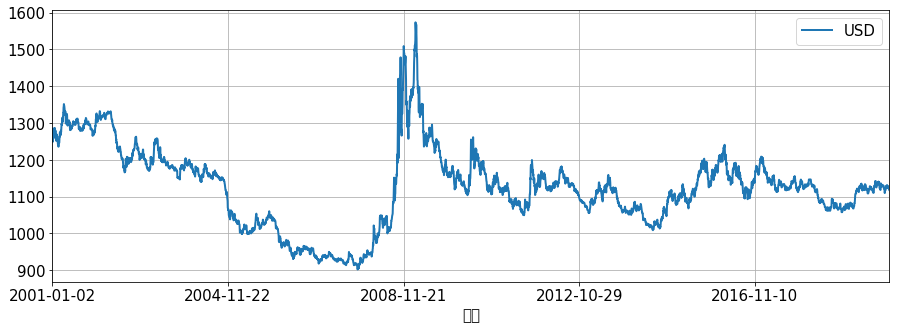

In [925]:
# 원본 데이터 분포 확인
exchange[['날짜','USD']].plot(x='날짜')

> 이상치로 보이는 값 없음

#### EUR

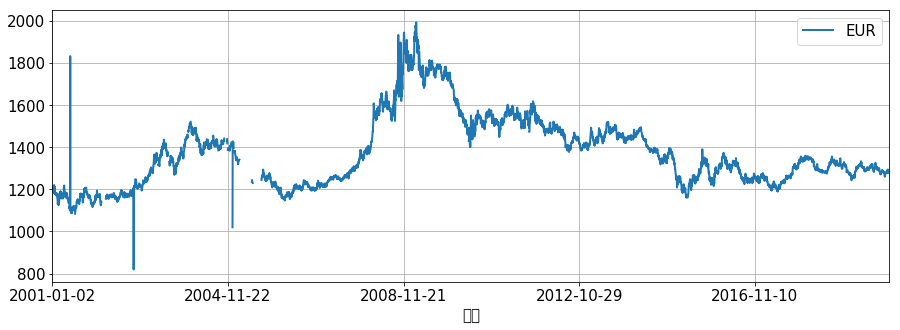

In [922]:
# 원본 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

> 결측치가 다수 존재하는 것으로 보이며 이상치가 존재하는 것으로 보임

In [936]:
# (1) 2001년 ~ 2002년 사이 이상치
exchange[exchange['EUR']>1800].head(5) # 102 2001-05-28 # 실제값 1107.53  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[102,2]=1107.53
exchange.iloc[102,2]

1107.53

In [937]:
# (2) 2004년 ~ 2006년 사이 이상치
exchange[exchange['EUR']<1100].tail(5) # 1026 2004-12-24  # 실제값 1419.43  # 출처: 한국은행경제통계시스템

# 바꾸기
exchange.iloc[1026,2]=1419.43
exchange.iloc[1026,2]

1419.43

In [938]:
# (3) 2004년 ~ 2006년 사이 이상치
exchange[exchange['EUR']<1000].head(5) # 463 2002-09-28 # 실제값 없음

# 바꾸기
exchange.iloc[463,2]=np.nan
exchange.iloc[463,2]

nan

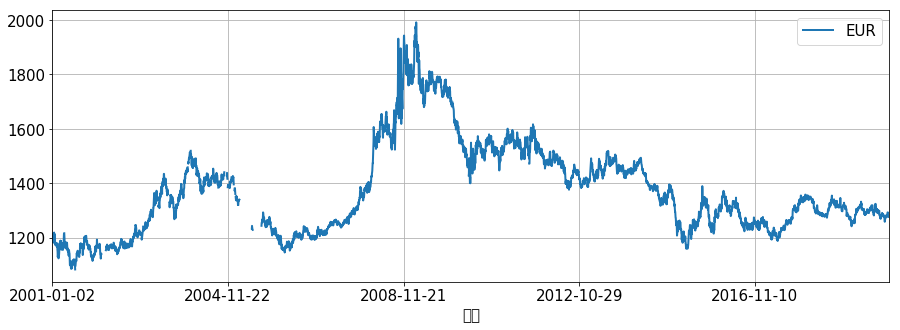

In [939]:
# 수정 후 데이터 분포 확인
exchange[['날짜','EUR']].plot(x='날짜')

#### CNY

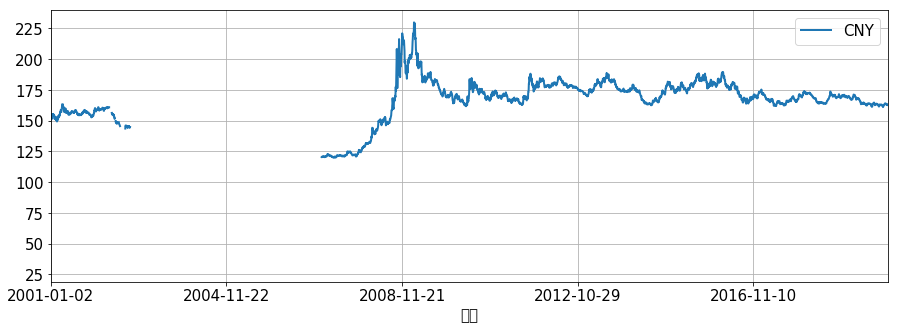

In [942]:
# 원본 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

> 일정 구간이 결측치 값으로 데이터가 존재하지 않으며, 2007년 부근에 이상치가 존재하는 것으로 보임

In [941]:
# (1) 2006년 ~ 2008년 사이 이상치
exchange[exchange['CNY']<100].head() # 1555 2007-02-02 # 실제값 120.87

# 바꾸기
exchange.iloc[1555,3]=120.87
exchange.iloc[1555,3]

120.87

In [944]:
# (2) 2002년 이상치
exchange[exchange['CNY']<100] # 391 2002-06-25 # 실제값 없음

# 결측치 처리
exchange.iloc[391,3]=np.nan
exchange.iloc[391,3]

nan

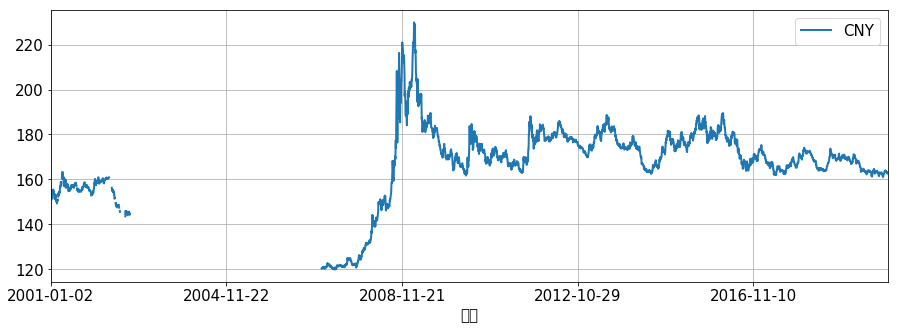

In [945]:
# 수정 후 데이터 분포 확인
exchange[['날짜','CNY']].plot(x='날짜')

#### JPY

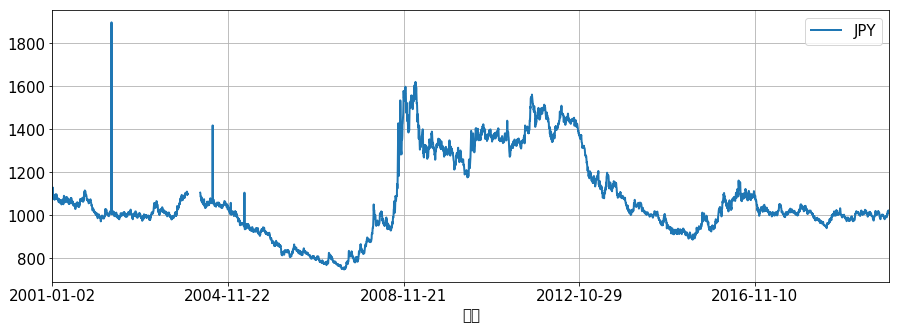

In [946]:
# 원본 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

> 결측치가 존재하는 것으로 보이며 2005년 근처에 이상치가 존재하는 것으로 보임

In [948]:
# (1) 2003년 ~ 2005년 사이 이상치
exchange[exchange['JPY']>1400].head() # 337 2002-04-20 #실제값 1005.52 # 913  2004-07-14  #실제값 1059.97

# 바꾸기
exchange.iloc[337,4] = 1005.52
exchange.iloc[913,4] = 1059.97
exchange.iloc[913,4]

1059.97

In [952]:
# (2) 2005년 이상치
exchange[exchange['JPY']>1100] # 1094 2005-03-01 #실제값 949.56

# 바꾸기
exchange.iloc[1094,4]=949.56
exchange.iloc[1094,4]

949.56

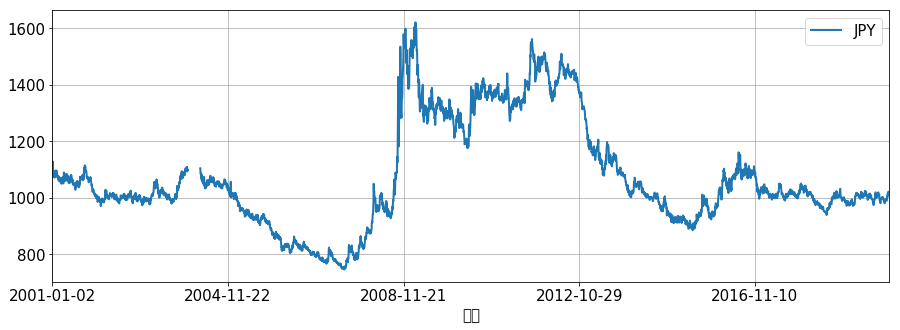

In [953]:
# 수정 후 데이터 분포 확인
exchange[['날짜','JPY']].plot(x='날짜')

#### GBP

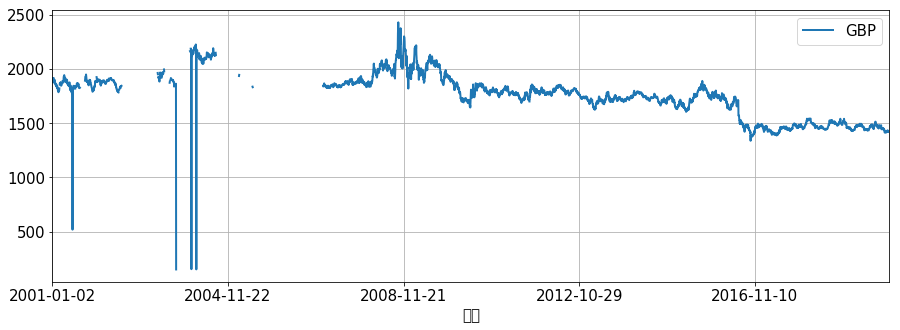

In [954]:
# 원본 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

> 결측치와 이상치가 다수 존재하는 것으로 보임

In [955]:
# 2001년 ~ 2005년 사이 이상치
exchange[exchange['GBP']<1000]

# 115 2001-06-15 # 1809.03
# 705 2003-09-09 # 1857.66
# 792 2004-01-16 # 2166.11
# 820 2004-03-02 # 2199.64

,날짜,USD,EUR,CNY,JPY,GBP
115,2001-06-15,1291.7,1114.61,156.05,1064.09,517.33
705,2003-09-09,1172.8,1298.11,NaN,1005.62,150.37
792,2004-01-16,1187.4,1495.59,NaN,NaN,152.95
820,2004-03-02,1176.5,1465.62,NaN,NaN,151.15


In [956]:
# 바꾸기
exchange.iloc[115,5] = 1809.03
exchange.iloc[705,5] = 1857.66
exchange.iloc[792,5] = 2166.11
exchange.iloc[820,5] = 2199.64

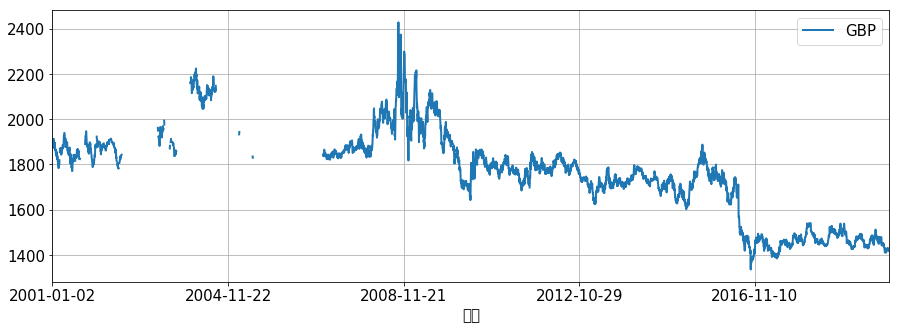

In [957]:
# 수정 후 데이터 분포 확인
exchange[['날짜','GBP']].plot(x='날짜')

# 결측치 처리하기 _ (market , per , economic, exchange)

- 결측치 = NaN
- 특정 구간이 통째로 결측치 
- USD를 제외한 모든 변수에 결측치가 존재

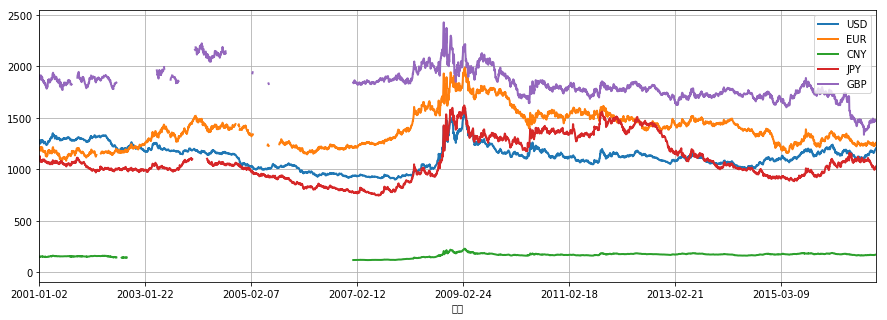

In [323]:
%matplotlib inline
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,5)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

exchange.plot(x='날짜')

- 결측치의 분포가 데이터 상에 구간화되어있는 것을 확인할 수 있다.
- 단순하게 i-1번째와 i+1번째의 평균으로 결측치 처리를 할 수 없다.

#### 결측치 처리 방법 후보
1. 버린다
2. 전체 평균으로 채운다
3. 구간의 앞뒤 평균으로 채운다

**특정 구간의 결측치를 예측하는 방향으로 간다 => 시계열 예측**

## 시계열 예측 할 수 있을까? fear.ML
### ARIMA

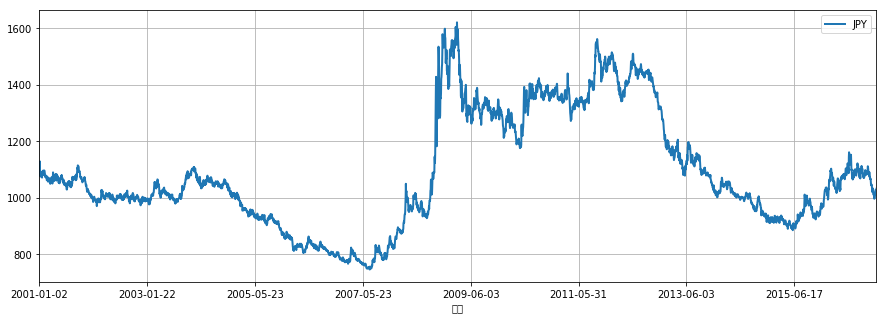

In [353]:
## jpy 데이터 준비
data_jpy = exchange[exchange['JPY'].isnull()==False]
data_jpy = data_jpy[['날짜','JPY']]
data_jpy
data_jpy.plot(x='날짜')

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


KeyboardInterrupt: 

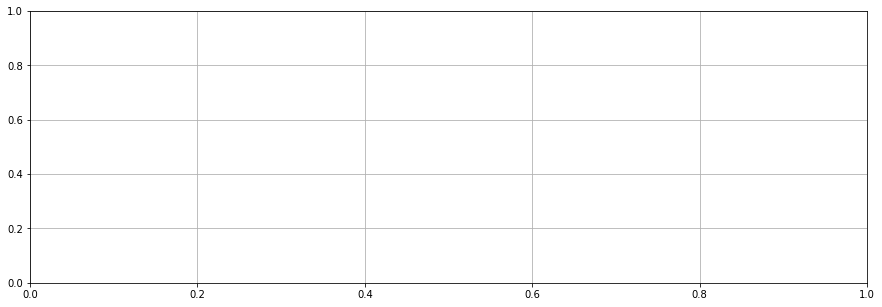

In [379]:
# 자기공선성 확인
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf(data_jpy.iloc[:,1])
plot_pacf(data_jpy.iloc[:,1])
plt.show()

- tag 600정도에서 자기상관이 양에서 음으로 변한다 -> 따라서 p=0
- 1차 차분 후에 다시 확인한다
[참고](https://byeongkijeong.github.io/ARIMA-with-Python/)

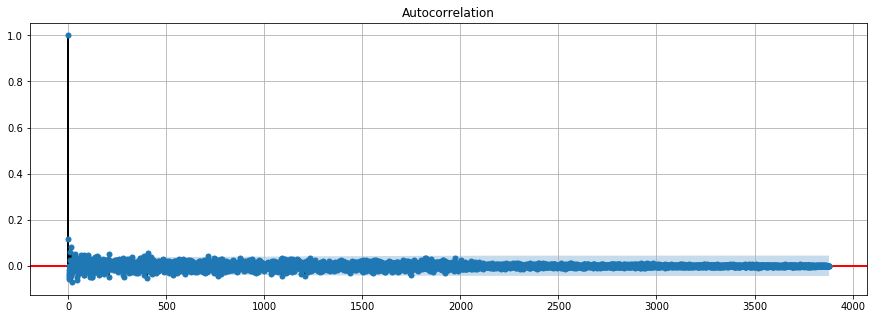

In [378]:
diff_1=data_jpy.iloc[:,1].diff(periods=1).iloc[1:]
#diff_1.plot()
plot_acf(diff_1)
plt.show()

> autocollinearity를 띄던 분포가 non-autocollinearity를 띄는 것으로 변환됨 -> 차분 d = 1 이 적절하다

In [355]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.429
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29638.858
Time:                        16:56:21   BIC                          29657.649
Sample:                             1   HQIC                         29645.529
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0170      0.199     -0.085      0.932      -0.408       0.374
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots       

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [356]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_jpy.iloc[:,1], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.JPY   No. Observations:                 3881
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -14816.433
Method:                       css-mle   S.D. of innovations             11.009
Date:                Sat, 02 Nov 2019   AIC                          29636.865
Time:                        16:56:27   BIC                          29649.393
Sample:                             1   HQIC                         29641.313
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.JPY     0.1286      0.016      7.840      0.000       0.096       0.161
                                    Roots                                    
                  Real          Imaginary         

C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


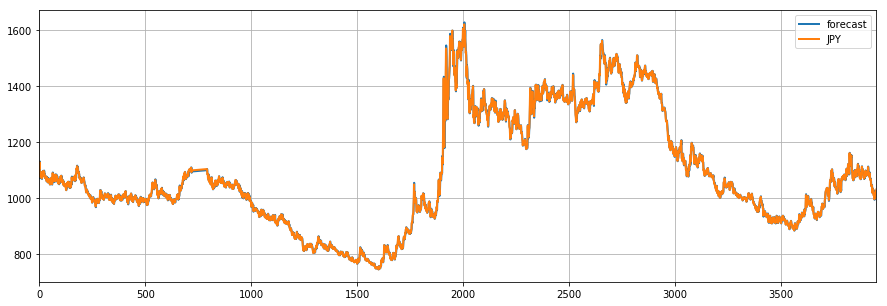

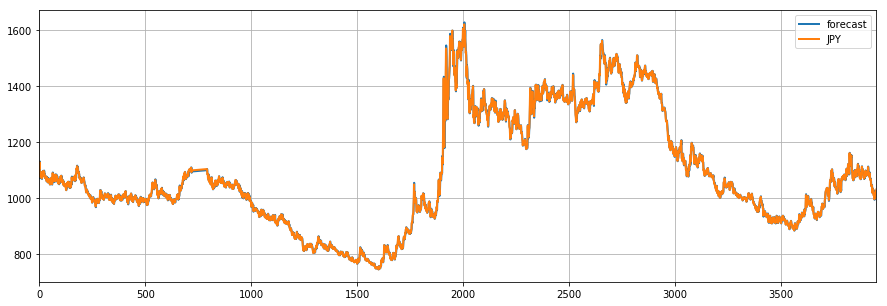

In [287]:
model_fit.plot_predict()

In [288]:
fore = model_fit.forecast(steps=1)
fore=float(fore[0])
fore = round(fore,2)
fore

1032.38

## ARIMA로 결측치 예측하는 모듈 만들기

> nan을 포함하지 않은 전체 모형의 추이가 (0,1,1) parameter에 적절하다고 판단하여 파라미터를 다음과 같이 설정. 자동화 모듈을 만든다

1. 데이터를 받는다.(날짜와 quantity변수가 포함된 n*2 dataframe형식)
2. 데이터의 Nan를 찾고 NaN가 나타날 때마다 데이터를 자른다
3. 잘라낸 데이터(nan이 없는 데이터)로 ARIMA 모델을 학습시킨 후 예측값을 출력한다.
4. 예측값을 빈 리스트에 저장한다
5. 더이상 nan이 나타나지 않고 data의 length까지 도달할 경우 반복을 멈춘다
6. 결과 리스트를 NaN 위치에 대체하고 new data를 저장한다
7. new data를 반환한다

In [211]:
def fill_na_ARIMA(x):
    # 1. 데이터 받기 - col하나만 가지고 있는 데이터 ex)exchange['JPY'] - pd.Series형식
    # 2. NaN 찾아내기
    i = 0
    while x.iloc[:,1].isnull().sum() > 0:
        if x.iloc[:,1].isnull()[i]==True:
            # 3. nan발견하면 데이터 자르기
            train = x.iloc[:,1]
            train = train[:i]
            # 
            model = ARIMA(train, order=(0,1,1))
            model_fit = model.fit(trend='nc',full_output=True, disp=1)
            fore = model_fit.forecast(steps=1)
            pred = float(fore[0])
            pred = round(pred,2)
            x.iloc[i,1] = pred
            i = 0
            continue
        else:
            i += 1    
    return x

In [277]:
new_EUR = fill_na_ARIMA(exchange[['날짜','EUR']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [278]:
new_EUR.isnull().sum()

날짜     0
EUR    0
dtype: int64

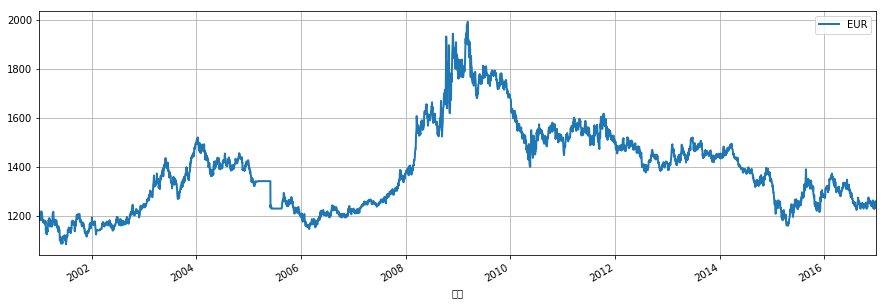

In [279]:
new_EUR.plot(x='날짜')

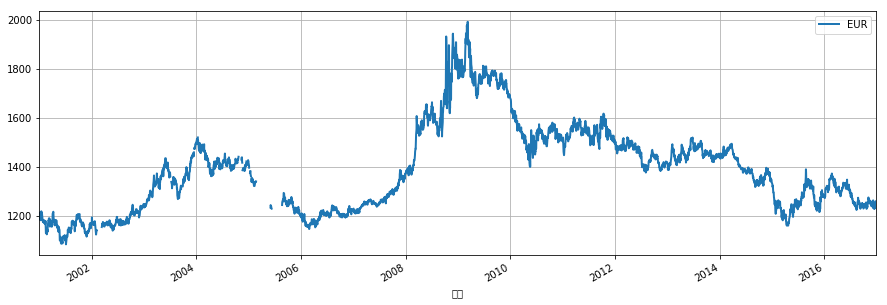

In [280]:
# 원본 데이터
exchange[['날짜','EUR']].plot(x = '날짜')

## 결측치 처리 후 파일 내보내기

### 결측치 처리

In [357]:
## CNY
new_CNY = fill_na_ARIMA(exchange[['날짜','CNY']])

C:\Users\genie\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\genie\

In [358]:
new_CNY.isnull().sum()

날짜     0
CNY    0
dtype: int64

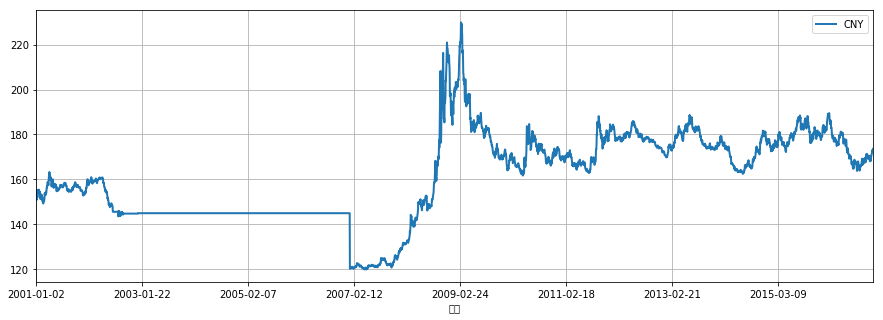

In [359]:
new_CNY.plot(x='날짜')

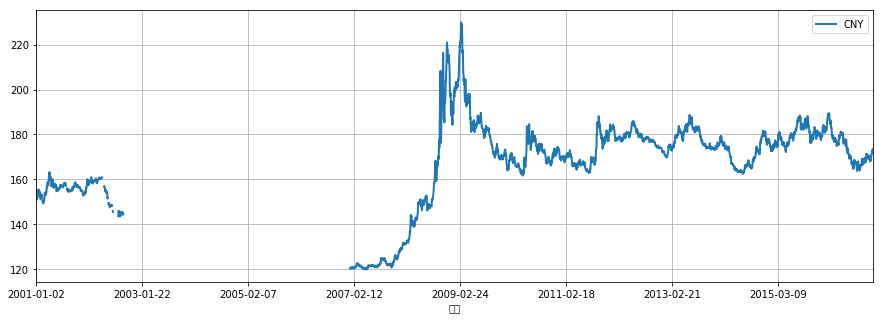

In [360]:
# 원본 데이터
exchange[['날짜','CNY']].plot(x = '날짜')

In [329]:
## JPY
new_JPY = fill_na_ARIMA(exchange[['날짜','JPY']])

In [330]:
new_JPY.isnull().sum()

날짜     0
JPY    0
dtype: int64

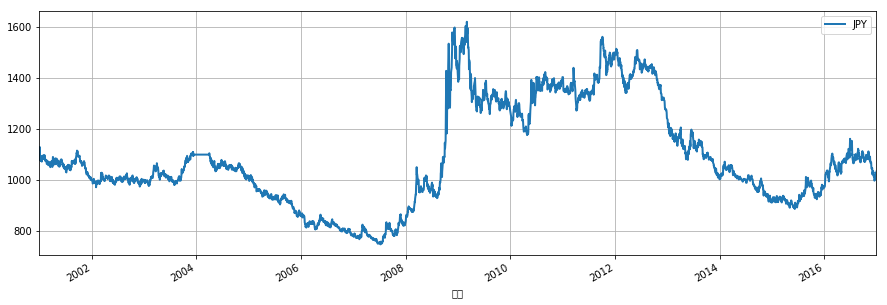

In [331]:
new_JPY.plot(x='날짜')

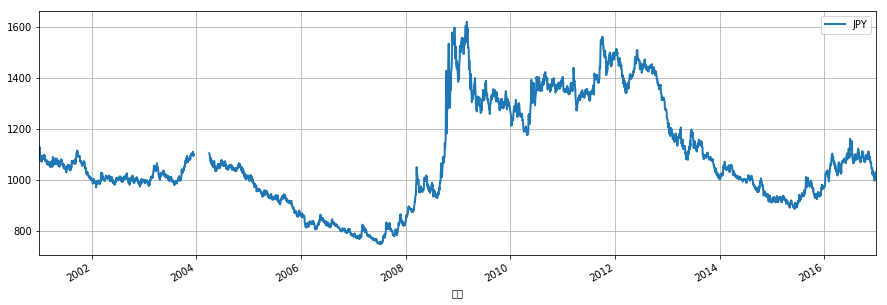

In [332]:
# 원본 데이터
exchange[['날짜','JPY']].plot(x = '날짜')

In [333]:
## GBP
new_GBP = fill_na_ARIMA(exchange[['날짜','GBP']])

In [334]:
new_GBP.isnull().sum()

날짜     0
GBP    0
dtype: int64

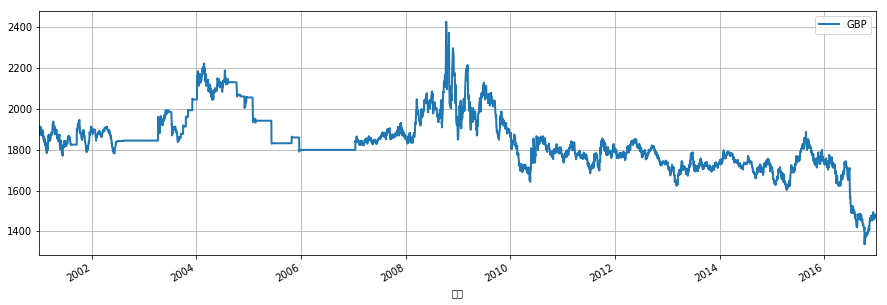

In [335]:
new_GBP.plot(x='날짜')

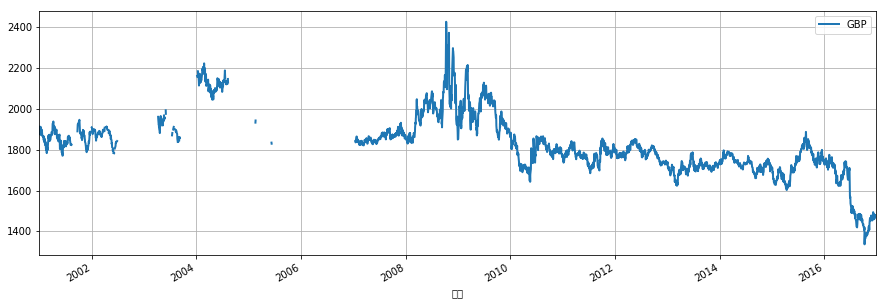

In [336]:
# 원본 데이터
exchange[['날짜','GBP']].plot(x = '날짜')

## VAR 모델 적용

- VAR
    - 다변량 시계열 모델

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D8BD2FCC0>,
      dtype=object)

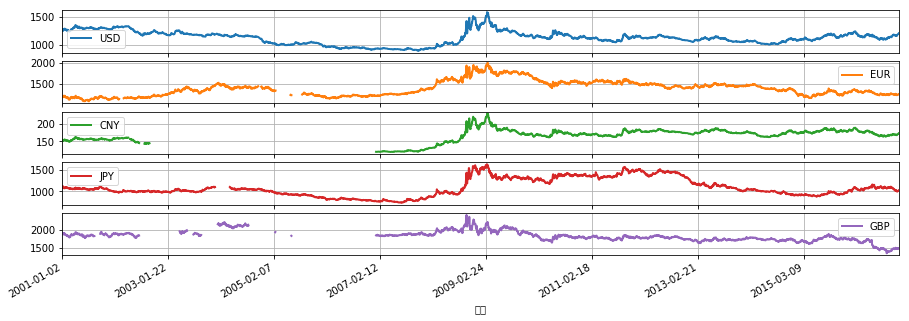

In [361]:
# 전체 데이터셋의 분포를 확인
exchange.plot(x= '날짜',subplots= True)

#### dropna로 결측값을 포함하지 않는 데이터만 가지고 VAR 분석

In [783]:
from statsmodels.tsa.vector_ar.var_model import VAR

# na가 없는 데이터
exchange_no_na = exchange.dropna()

# 날짜가 없는 데이터
exchange_var = np.asarray(exchange_no_na.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(exchange_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:52:51
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    16.1433
Nobs:                     2742.00    HQIC:                   16.1020
Log likelihood:          -41467.4    FPE:                9.61240e+06
AIC:                      16.0786    Det(Omega_mle):     9.50792e+06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         6.559053         3.337514            1.965           0.049
L1.y1         0.995278         0.003296          301.925           0.000
L1.y2        -0.000785         0.002303           -0.341           0.733
L1.y3         0.010034

##### 변수 USD(y1) EUR(y2) CNY(y3) JPY(y4) GBP(y5) 에 대한 VAR 분석 결과

- EUR(y2)에 유의한 변수: 없음 - 상관계수 : y5
- CNY(y3)에 유의한 변수: 

## VAR로 결측치 예측하는 모듈 만들기

> 변수간의 상관관계를 분석한 결과, exchange안의 모든 변수들이 서로 상관관계를 가지고 있다고 판단. -> VAR로 변수간의 상관관계를 포함한 시계열 예측을 시행한다

In [670]:
def fill_na_VAR(x): 
    # 1. 모든 변수를 포함한 데이터 
    ### 1-1. 날짜를 제외한 데이터를 만든다
    data = x.drop('날짜', axis = 1) ## type:DataFrame
    ### 1-2. 필요한 변수 설정하기
    total_na = data.isnull().sum().sum() # 데이터 전체 na개수 총합 ## type:int
    n_row = data.shape[0] # 데이터 row 개수 ## type:int
    n_col = data.shape[1] # 데이터 col 개수 ## type:int
    
    # 2. NaN 찾아내기
    while total_na > 0: # na가 존재한다는 전제 하에
        for i in range(n_row): # row를 기준으로 for loop
            irow_na = data.iloc[i,:].isnull().sum() # i번째 행의 na개수 총합 ## type:int
            #print(irow_na)
            
            if irow_na != 0: # i번째 행에 na가 존재하면
                # 3. nan발견하면 데이터 자르기
                train = data.iloc[:i,:] # type:DataFrame
                #print(train)
                train_ar = np.asarray(train) # type:np.array (i-1*n_col)
                #print(train_ar)

                # 4. VAR 분석 -> 함수로 만들기
                var = sm.tsa.VAR(train_ar)
                resvar = var.fit()
                pred = resvar.forecast(resvar.y, 1) # type:np.array (1*n_col)
                #print(pred)
                for j in range(n_col): # col 기준으로
                    if data.iloc[i,:].isnull()[j]: # numeric변수만 담긴 데이터의 i*j위치의 값이 na이면 ## type:bool
                        #print((i,j))
                        # 5. 필요한 예측값만 뽑아오기
                        ans = pred[0,j] # pred의 j번째 값 가져오기 ## type:float64
                        ans = round(ans,2) # type:float64
                        #print(ans)
                        # 6. 해당 위치에 대체하기
                        data.iloc[i,j] = np.nan_to_num(ans) # type:float64
                        #print(data.iloc[i,j])
                continue
        break
    
    final = pd.concat([x['날짜'],data], axis = 1) 
    final['날짜'] = pd.to_datetime(final['날짜'], format="%Y/%m/%d") # 날짜 format 변경 object->datetime
    
    return final ## type:DataFrame

In [634]:
sample = exchange.iloc[:35,:]
#sample.iloc[15,3]
#sample.iloc[i,:].isnull()[j]
sample.iloc[15,:].isnull()[3]

True

In [636]:
fill_na_VAR(sample)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
       USD      EUR     CNY      JPY      GBP
0   1259.7  1185.38  152.19  1099.07  1885.02
1   1267.8  1205.49  153.15  1108.07  1903.35
2   1285.4  1193.24  155.29  1128.53  1914.15
3   1249.3  1190.90  150.92  1078.01  1876.82
4   1267.8  1215.06  153.16  1088.71  1906.33
5   1264.6  1196.69  152.77  1088.67  1892.98
6   1257.9  1187.39  151.97  1074.67  1873.01
7   1261.6  1181.93  152.42  1083.57  1876.19
8   1276.6  1214.30  154.24  1082.41  1911.20
9   1281.2  1218.23  154.79  1078.50  1895.09
10  1285.9  1212.15  155.37  1079.91  1898.37
11  1284.4  1210.48  155.18  1091.06  1891.21
12  1277.2  1194.76  154.32  1071.25  1881.44
13  1286.5  1213.11  155.44  1090.44  1895.01
14  1276.7  1193.91  154.26  1094.05  1869.09
[[1259.7  1185.38  152.19 1099.07 1885.02]
 [1267.8  1205.49  153.15 1108.07 1903.35]
 [1285.4  1193.24  155.29 1128.53 1914.15]
 [1249.3  1190.9   150.92 1078.01 1876.82]
 [1267.8  1215.06  153.16 1088.71 1906.33]
 [1264.6  1196.69

,USD,EUR,CNY,JPY,GBP
0,1259.7,1185.38,152.19,1099.07,1885.02
1,1267.8,1205.49,153.15,1108.07,1903.35
2,1285.4,1193.24,155.29,1128.53,1914.15
3,1249.3,1190.90,150.92,1078.01,1876.82
4,1267.8,1215.06,153.16,1088.71,1906.33
5,1264.6,1196.69,152.77,1088.67,1892.98
6,1257.9,1187.39,151.97,1074.67,1873.01
7,1261.6,1181.93,152.42,1083.57,1876.19
8,1276.6,1214.30,154.24,1082.41,1911.20
9,1281.2,1218.23,154.79,1078.50,1895.09


In [958]:
exchange_final = fill_na_VAR(exchange)

In [672]:
exchange_final.head(5)

,날짜,USD,EUR,CNY,JPY,GBP
0,2001-01-02,1259.7,1185.38,152.19,1099.07,1885.02
1,2001-01-03,1267.8,1205.49,153.15,1108.07,1903.35
2,2001-01-04,1285.4,1193.24,155.29,1128.53,1914.15
3,2001-01-05,1249.3,1190.90,150.92,1078.01,1876.82
4,2001-01-08,1267.8,1215.06,153.16,1088.71,1906.33


In [959]:
exchange_final.isnull().sum()

날짜     0
USD    0
EUR    0
CNY    0
JPY    0
GBP    0
dtype: int64

### 결측치를 채운 데이터 확인

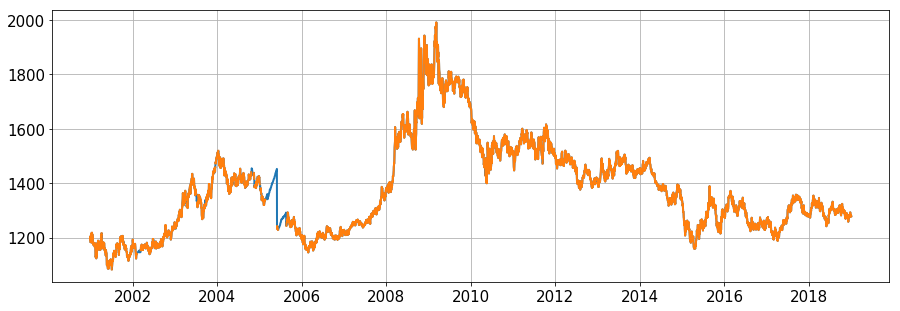

In [962]:
# EUR
plt.plot(exchange_final[['날짜']],exchange_final[['EUR']])
plt.plot(exchange_final[['날짜']],exchange[['EUR']])
plt.show()

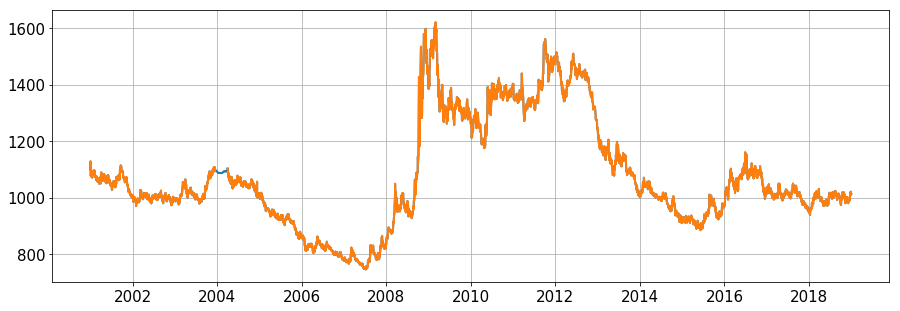

In [963]:
# JPY
plt.plot(exchange_final[['날짜']],exchange_final[['JPY']])
plt.plot(exchange_final[['날짜']],exchange[['JPY']])
plt.show()

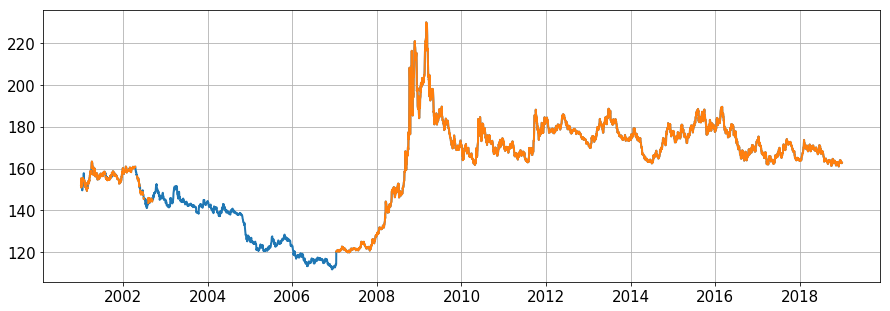

In [964]:
# CNY
plt.plot(exchange_final[['날짜']],exchange_final[['CNY']])
plt.plot(exchange_final[['날짜']],exchange[['CNY']])
plt.show()

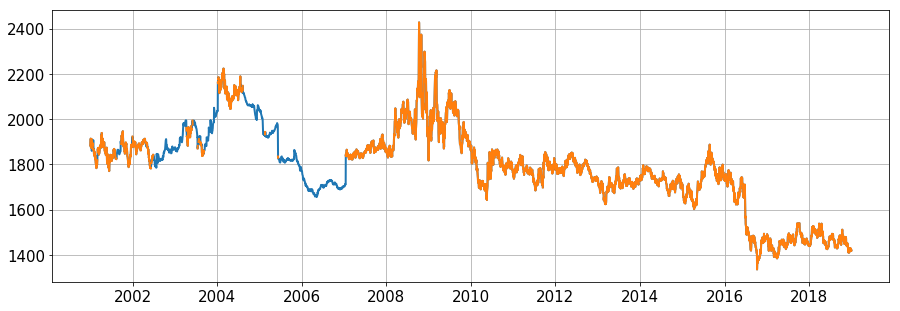

In [965]:
# GBP
plt.plot(exchange_final[['날짜']],exchange_final[['GBP']])
plt.plot(exchange_final[['날짜']],exchange[['GBP']])
plt.show()

## 결측치 처리한 데이터 내보내기

In [966]:
exchange_final.to_csv('exchange_final.csv',index=False,encoding = 'euc-kr')

## 다른 데이터셋 처리하기
### market

In [970]:
market = pd.read_csv('./data/market.csv',encoding = 'euc-kr')
market[market['날짜']=='2001-01-02']

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),Dram Exchange 지수,브랜트유 가격,원유 WTI
261,2001-01-02,1746.3,6935.0,1552.5,270.6,5.2,4.8,4.9,6.7,6.7,7.2,NaN,24.3,27.2


In [971]:
market = market.iloc[261:,:]

In [972]:
market.isnull().sum()

날짜                    0
A등급 구리(현물)          142
니켈(현물)              143
알루미늄 99.7%(현물)      141
금괴(일간)               37
미국1년                169
미국3년                149
미국10년                84
국고채권(1년)            228
국고채권(3년)            228
국고채권(10년)           228
Dram Exchange 지수    339
브랜트유 가격              77
원유 WTI              157
dtype: int64

> 결측값이 다수 존재하며 결측치가 NaN형태임을 알 수 있다

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBB607940>,
      dtype=object)

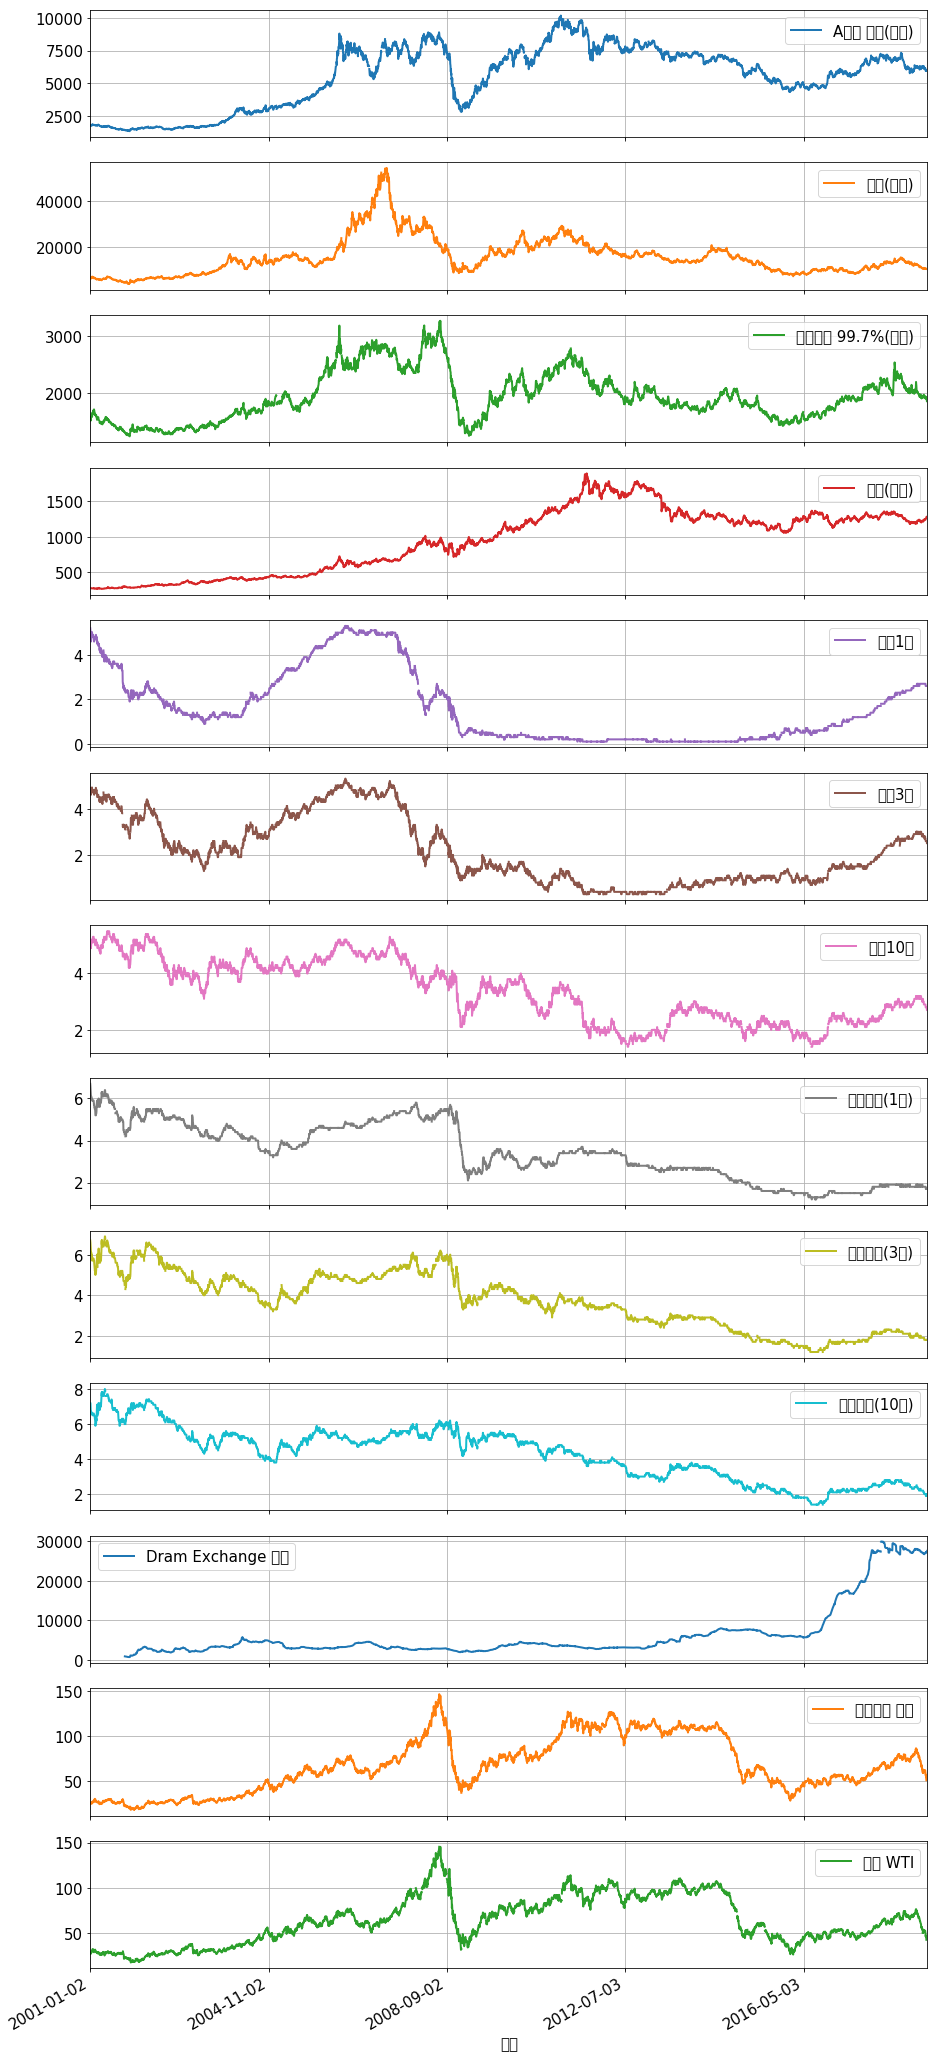

In [973]:
import matplotlib.pylab as plb
plb.rcParams["figure.figsize"] = (15,40)
plb.rcParams['lines.linewidth'] = 2
plb.rcParams['lines.color'] = 'r'
plb.rcParams['axes.grid'] = True 

market.plot(subplots = True, x = '날짜')

> 전체적인 형태를 살펴본 결과, 특별한 이상치는 확인되지 않았고 결측치 처리가 필요함을 알 수 있다.

#### 요주의 변수: Dram Exchange 지수

- 2001년 ~ 2002년 사이의 일정 구간 데이터가 존재하지 않음 -> fill_na_VAR을 사용할 수 없음 -> Dram Exchange를 제외한 채 VAR을 돌린다

### VAR 모듈로 자동 결측치 처리 (Dram Exchange 지수 제외)

In [974]:
market_noDram = market.drop('Dram Exchange 지수', axis = 1)

In [782]:
# 결측치가 없는 데이터로 var 결과 확인하기

market_noDram_var = market_noDram.dropna()
market_noDram_var = np.asarray(market_noDram_var.drop('날짜',axis = 1))

# VAR 분석
mvar = sm.tsa.VAR(market_noDram_var)
resvar = mvar.fit()
print(resvar.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Nov, 2019
Time:                     14:49:11
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -1.82707
Nobs:                     3742.00    HQIC:                  -1.99434
Log likelihood:          -59655.8    FPE:                   0.124098
AIC:                     -2.08668    Det(Omega_mle):        0.119040
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         18.620385        28.826848            0.646           0.518
L1.y1          0.990642         0.003917          252.898           0.000
L1.y2          0.000957         0.000467            2.049           0.040
L1.y3         -0.

In [975]:
market_noDram_final = fill_na_VAR(market_noDram)

In [744]:
market_noDram_final

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),브랜트유 가격,원유 WTI
0,2001-01-02,1746.30,6935.00,1552.50,270.6,5.20,4.80,4.90,6.70,6.70,7.20,24.30,27.20
1,2001-01-03,1716.80,6370.00,1515.50,267.5,5.10,4.90,5.20,6.60,6.60,7.20,25.00,28.00
2,2001-01-04,1750.50,6569.00,1519.00,267.7,4.90,4.80,5.00,6.40,6.40,6.90,25.40,28.10
3,2001-01-05,1740.30,6607.00,1527.50,268.2,4.60,4.60,4.90,6.20,6.20,6.70,25.20,28.00
4,2001-01-08,1775.00,6734.00,1578.00,268.3,4.60,4.60,4.90,6.10,6.10,6.60,24.40,27.30
5,2001-01-09,1783.30,6796.00,1572.30,267.4,4.70,4.70,5.00,6.10,6.10,6.70,24.60,27.60
6,2001-01-10,1779.80,6947.00,1591.00,266.3,4.90,4.80,5.10,6.10,6.10,6.70,25.30,29.50
7,2001-01-11,1795.00,7140.00,1597.50,263.9,4.90,4.80,5.10,6.00,6.00,6.60,25.60,29.40
8,2001-01-12,1807.50,7325.00,1632.50,264.3,5.00,4.90,5.20,6.00,6.00,6.60,25.80,30.10
9,2001-01-15,1800.80,7145.00,1626.00,263.6,5.18,5.05,5.20,6.00,6.00,6.60,26.20,30.36


In [753]:
kospi_date['날짜'] = pd.to_datetime(kospi_date['날짜'], format="%Y/%m/%d")
#kospi_date

C:\Users\genie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [755]:
market_noDram_final = market_noDram_final.merge(kospi_date,how = 'inner',on = '날짜')
market_noDram_final

,날짜,A등급 구리(현물),니켈(현물),알루미늄 99.7%(현물),금괴(일간),미국1년,미국3년,미국10년,국고채권(1년),국고채권(3년),국고채권(10년),브랜트유 가격,원유 WTI
0,2001-01-02,1746.30,6935.00,1552.50,270.6,5.20,4.80,4.90,6.7,6.7,7.2,24.30,27.20
1,2001-01-03,1716.80,6370.00,1515.50,267.5,5.10,4.90,5.20,6.6,6.6,7.2,25.00,28.00
2,2001-01-04,1750.50,6569.00,1519.00,267.7,4.90,4.80,5.00,6.4,6.4,6.9,25.40,28.10
3,2001-01-05,1740.30,6607.00,1527.50,268.2,4.60,4.60,4.90,6.2,6.2,6.7,25.20,28.00
4,2001-01-08,1775.00,6734.00,1578.00,268.3,4.60,4.60,4.90,6.1,6.1,6.6,24.40,27.30
5,2001-01-09,1783.30,6796.00,1572.30,267.4,4.70,4.70,5.00,6.1,6.1,6.7,24.60,27.60
6,2001-01-10,1779.80,6947.00,1591.00,266.3,4.90,4.80,5.10,6.1,6.1,6.7,25.30,29.50
7,2001-01-11,1795.00,7140.00,1597.50,263.9,4.90,4.80,5.10,6.0,6.0,6.6,25.60,29.40
8,2001-01-12,1807.50,7325.00,1632.50,264.3,5.00,4.90,5.20,6.0,6.0,6.6,25.80,30.10
9,2001-01-15,1800.80,7145.00,1626.00,263.6,5.18,5.05,5.20,6.0,6.0,6.6,26.20,30.36


In [878]:
market_noDram_final.isnull().sum()

날짜                0
A등급 구리(현물)        0
니켈(현물)            0
알루미늄 99.7%(현물)    0
금괴(일간)            0
미국1년              0
미국3년              0
미국10년             0
국고채권(1년)          0
국고채권(3년)          0
국고채권(10년)         0
브랜트유 가격           0
원유 WTI            0
dtype: int64

In [976]:
## Dram없이 결측치 처리한 파일 내보내기
market_noDram_final.to_csv('market_noDram_final.csv',index = False, encoding = 'euc-kr')

#### Dram 지수 확인

In [757]:
dram = market[['날짜','Dram Exchange 지수']]

In [780]:
dram.iloc[150:200,:]

,날짜,Dram Exchange 지수
150,2001-07-31,NaN
151,2001-08-01,NaN
152,2001-08-02,NaN
153,2001-08-03,NaN
154,2001-08-06,NaN
155,2001-08-07,NaN
156,2001-08-08,NaN
157,2001-08-09,NaN
158,2001-08-10,NaN
159,2001-08-13,NaN


> 2001-10-01부터 등장하는 Dram Exchange 지수 -> 모든 칼럼을 2001-10-01부터 시작하는 사본을 만든 후 결측치 처리 -> 이후 결과보기 

In [802]:
#market_dram10 = market.iloc[197:,:].reset_index().drop('index',axis = 1)
#market_dram10
market_dram10 = fill_na_VAR(market_dram10)

ValueError: x already contains a constant

### kospi

In [898]:
kospi = pd.read_csv('./data/KOSPI_국면분석.csv', encoding = 'euc-kr')

,날짜,Y,지수시가,지수고가,지수저가,지수종가,거래량,거래대금,상장주식수,시가총액,...,보합종목수,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,배당 수익율
4444,2018-12-21,하락,2052.70,2061.51,2049.76,2061.49,311388800,5492537,51871131,1357352795,...,70,0,0,0,0,622,897,36,108,0.0
4445,2018-12-24,하락,2050.38,2059.94,2046.18,2055.01,285275000,3843849,51987246,1352900455,...,71,1,0,0,0,573,946,27,87,0.0
4446,2018-12-26,하락,2028.81,2037.83,2014.28,2028.01,321499300,5424078,52009400,1336757289,...,44,0,0,0,0,430,1089,44,205,0.0
4447,2018-12-27,상승,2032.09,2035.57,2021.39,2028.44,398021300,5351003,52094807,1335555861,...,45,1,1,0,0,456,1064,12,40,0.0
4448,2018-12-28,하락,2036.70,2046.97,2035.41,2041.04,352677700,4120695,52094789,1343971857,...,67,0,0,0,0,529,991,10,33,0.0


In [902]:
kospi.isnull().sum()

날짜             0
Y              0
지수시가           0
지수고가           0
지수저가           0
지수종가           0
거래량            0
거래대금           0
상장주식수          0
시가총액           0
자본금            0
외국인보유주식수       0
외국인보유시가총액      0
신용거래종목수        0
신용가능종목거래량      0
신용자료일자         1
전체종목수          0
회사수            0
거래형성종목수        0
상승종목수          0
하락종목수          0
보합종목수          0
상한종목수          0
하한종목수          0
연중최고가종목수       0
연중최저가종목수       0
25일이평상회종목건수    0
25일이평하회종목건수    0
52주신고가종목수      0
52주신저가종목수      0
배당 수익율         0
dtype: int64

In [900]:
kospi.shape

(4449, 31)

In [982]:
kospi_noB = kospi[kospi['배당 수익율']!=0]

,날짜,Y,지수시가,지수고가,지수저가,지수종가,거래량,거래대금,상장주식수,시가총액,...,보합종목수,상한종목수,하한종목수,연중최고가종목수,연중최저가종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수,배당 수익율
2909,2012-09-21,하락,2000.05,2005.11,1991.56,2002.37,649195100,4964441,35728496,1153267051,...,79,5,7,0,0,836,225,67,3,1.32
2910,2012-09-24,하락,1996.42,2005.45,1977.70,2003.44,482969000,4272565,35728496,1154292327,...,77,3,8,0,0,824,237,56,1,1.32
2911,2012-09-25,상승,1994.08,2004.26,1988.88,1991.41,528994300,4596751,35730829,1147413338,...,73,8,8,0,0,766,295,50,3,1.33
2912,2012-09-26,상승,1973.11,1986.28,1968.85,1980.44,1209791100,4851962,35730844,1141196555,...,71,5,1,0,0,703,358,32,5,1.34
2913,2012-09-27,하락,1969.65,1991.26,1969.60,1988.70,693724900,4727367,35730844,1145989479,...,84,6,5,0,0,684,377,31,10,1.33
2914,2012-09-28,하락,2000.01,2000.01,1988.41,1996.21,678168200,5087596,35732885,1150626142,...,95,2,2,0,0,685,376,51,7,1.33
2915,2012-10-02,하락,1998.52,2003.63,1995.12,1996.03,496277900,3678874,35732971,1150652663,...,78,2,1,0,0,678,383,58,6,1.33
2916,2012-10-04,하락,1998.73,1998.99,1983.03,1992.68,596926400,4951129,35733366,1148638345,...,87,3,0,0,0,663,399,47,6,1.33
2917,2012-10-05,하락,2004.62,2007.84,1991.21,1995.17,681223500,4480730,35735295,1150075378,...,88,5,0,0,0,666,396,55,7,1.33
2918,2012-10-08,하락,1994.05,1994.05,1979.24,1981.89,508308900,4565278,35737291,1142562179,...,65,6,1,0,0,574,488,49,12,1.34


In [903]:
# 0 to nan
#kospi_nan = kospi.replace({0:np.nan})
#kospi_nan.isnull().sum()

# NaN가 없는 데이터
#kospi_dropna = kospi_nan.dropna()
#kospi_dropna

날짜                0
Y                 0
지수시가              0
지수고가              0
지수저가              0
지수종가              0
거래량               0
거래대금              0
상장주식수             0
시가총액              0
자본금               0
외국인보유주식수          0
외국인보유시가총액         0
신용거래종목수          41
신용가능종목거래량        41
신용자료일자            1
전체종목수             0
회사수               0
거래형성종목수           0
상승종목수             0
하락종목수             0
보합종목수             0
상한종목수           300
하한종목수          1521
연중최고가종목수       3549
연중최저가종목수       3551
25일이평상회종목건수       0
25일이평하회종목건수       0
52주신고가종목수       149
52주신저가종목수       250
배당 수익율         2949
dtype: int64

In [994]:
for i in range(kospi.shape[1]):
    print(i,kospi.columns[i])

0 날짜
1 Y
2 지수시가
3 지수고가
4 지수저가
5 지수종가
6 거래량
7 거래대금
8 상장주식수
9 시가총액
10 자본금
11 외국인보유주식수
12 외국인보유시가총액
13 신용거래종목수
14 신용가능종목거래량
15 신용자료일자
16 전체종목수
17 회사수
18 거래형성종목수
19 상승종목수
20 하락종목수
21 보합종목수
22 상한종목수
23 하한종목수
24 연중최고가종목수
25 연중최저가종목수
26 25일이평상회종목건수
27 25일이평하회종목건수
28 52주신고가종목수
29 52주신저가종목수
30 배당 수익율


> dropna로 NaN값을 제외한 VAR 분석을 돌리려 했으나 NaN가 존재하지 않는 데이터가 없다.

In [904]:
## 배당수익율 빼고 돌리기

kospi_noBD = kospi.drop(['연중최고가종목수','연중최저가종목수','배당 수익율'],axis = 1)
kospi_noBD = kospi_noBD.drop(['지수시가','지수고가','지수저가','Y'], axis = 1)
kospi_noBD

,날짜,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,...,거래형성종목수,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수
0,2001-01-02,520.95,231014600.0,1223328.0,19638887.0,1.912529e+08,84895076.0,2723222.0,58238292.0,746.0,...,853.0,618.0,215.0,22.0,167.0,16.0,26.0,73.0,1.0,85.0
1,2001-01-03,521.43,324584400.0,1583403.0,19633559.0,1.913632e+08,84868436.0,2727918.0,58249739.0,746.0,...,854.0,488.0,316.0,52.0,85.0,6.0,28.0,71.0,1.0,12.0
2,2001-01-04,558.02,444540900.0,2984761.0,19634734.0,2.040742e+08,84873582.0,2735566.0,62823637.0,746.0,...,855.0,752.0,83.0,20.0,149.0,3.0,42.0,57.0,1.0,2.0
3,2001-01-05,580.85,578286000.0,3569582.0,19637038.0,2.120892e+08,84885103.0,2747453.0,65820417.0,746.0,...,855.0,427.0,393.0,37.0,92.0,9.0,43.0,56.0,3.0,2.0
4,2001-01-08,586.65,558645100.0,2948092.0,19630735.0,2.142313e+08,84853590.0,2751599.0,66348238.0,746.0,...,854.0,533.0,278.0,45.0,72.0,5.0,43.0,56.0,6.0,1.0
5,2001-01-09,589.92,558967700.0,2833998.0,19636252.0,2.153550e+08,84881174.0,2754673.0,66495885.0,746.0,...,854.0,527.0,282.0,49.0,64.0,8.0,48.0,51.0,6.0,1.0
6,2001-01-10,560.81,642378200.0,3285030.0,19638291.0,2.051043e+08,84891369.0,2756865.0,63950968.0,746.0,...,857.0,137.0,698.0,23.0,36.0,35.0,44.0,55.0,7.0,2.0
7,2001-01-11,561.79,518788600.0,2721732.0,19641265.0,2.055613e+08,84906240.0,2749251.0,63694736.0,743.0,...,858.0,574.0,242.0,43.0,87.0,11.0,53.0,46.0,5.0,2.0
8,2001-01-12,587.87,713787700.0,3980149.0,19641865.0,2.147420e+08,84909240.0,2773909.0,70739059.0,743.0,...,857.0,494.0,298.0,68.0,27.0,9.0,57.0,42.0,6.0,1.0
9,2001-01-15,599.00,611961800.0,3407840.0,19093061.0,2.179435e+08,82165217.0,2701890.0,71929782.0,743.0,...,861.0,462.0,334.0,67.0,49.0,11.0,61.0,38.0,7.0,2.0


In [905]:
kospi_noBD_VAR = fill_na_VAR(kospi_noBD)
#kospi_noBD_VAR

In [906]:
kospi_noBD_VAR.to_csv('kospi_final.csv',index = False, encoding = 'euc-kr')

# 삭제된 변수
# 연중최고가종목수, 연중최저가종목수, 배당 수익율, 지수시가, 지수고가, 지수저가 , Y

In [1000]:
### kospi plot 나눠서 그리기
kospi_numeric = kospi.drop('Y',axis = 1)
kospi_plot1 = kospi_numeric.iloc[:,:5]

kospi_plot2 = kospi_numeric.iloc[:,5:10]
kospi_plot2 = pd.concat([kospi['날짜'],kospi_plot2],axis = 1)

kospi_plot3 = kospi_numeric.iloc[:,10:15]
kospi_plot3 = pd.concat([kospi['날짜'],kospi_plot3],axis = 1)

kospi_plot4 = kospi_numeric.iloc[:,15:20]
kospi_plot4 = pd.concat([kospi['날짜'],kospi_plot4],axis = 1)

kospi_plot5 = kospi_numeric.iloc[:,20:25]
kospi_plot5 = pd.concat([kospi['날짜'],kospi_plot5],axis = 1)

kospi_plot6 = kospi_numeric.iloc[:,25:]
kospi_plot6 = pd.concat([kospi['날짜'],kospi_plot6],axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBD521A90>,
      dtype=object)

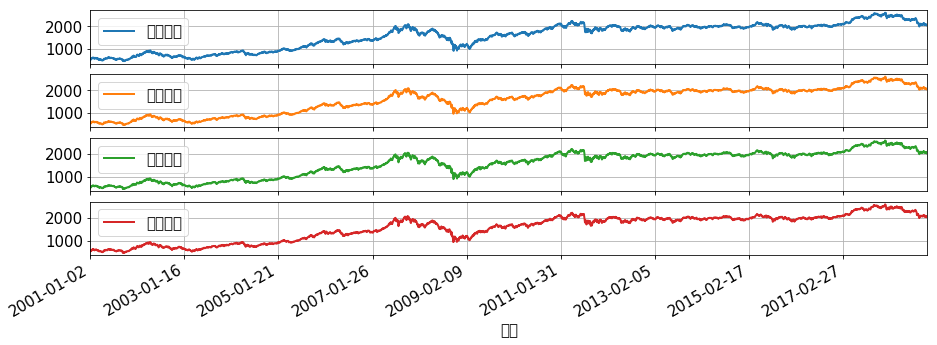

In [984]:
# 지수시가 / 지수고가 / 지수저가 / 지수종가
plb.rcParams["figure.figsize"] = (15,5)
kospi_plot1.plot(subplots = True,x = '날짜')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBD3A7CF8>,
      dtype=object)

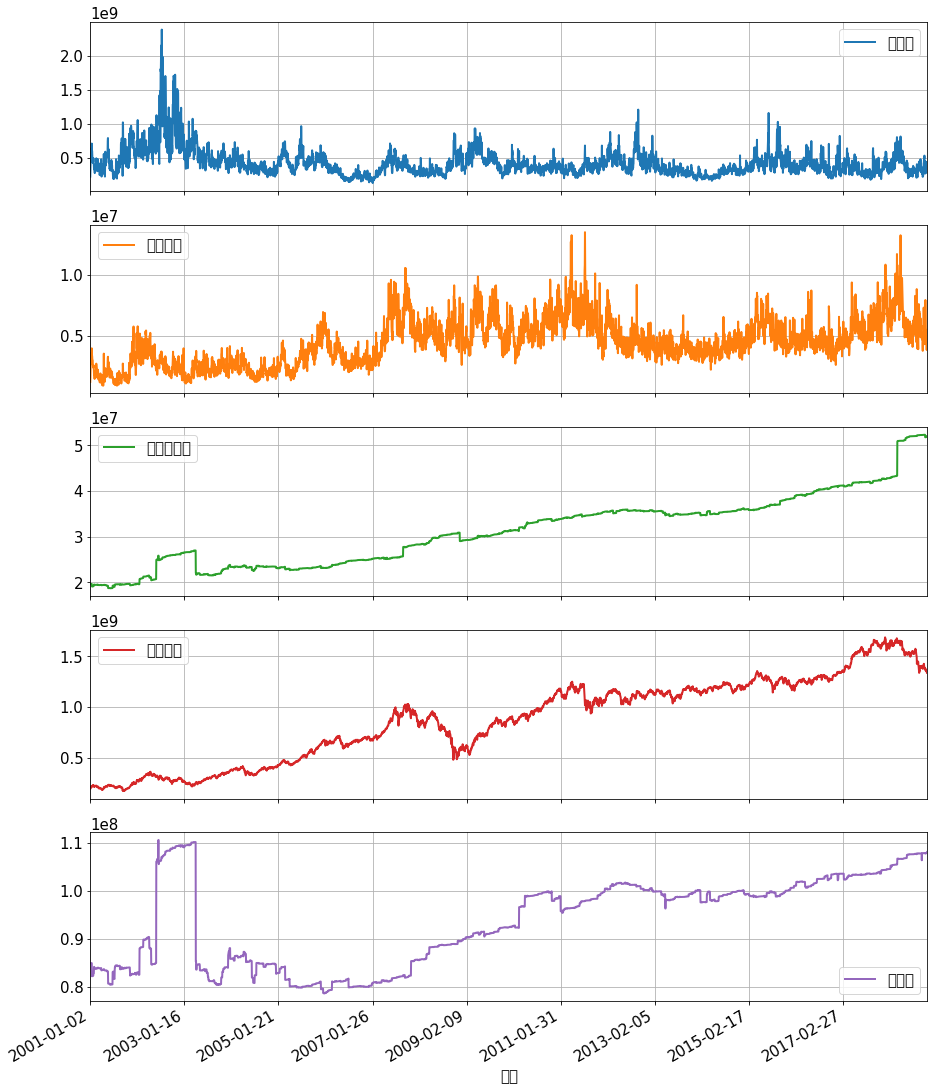

In [985]:
# 거래량 / 거래대금 / 상장주식수 / 시가총액 / 자본금

plb.rcParams["figure.figsize"] = (15,20)
kospi_plot2.plot(subplots = True,x = '날짜')

#### 상장주식수 / 자본금의 급증현상 탐색

In [876]:
kospi_noBD.iloc[350:352,:]

,날짜,지수종가,거래량,거래대금,상장주식수,시가총액,자본금,외국인보유주식수,외국인보유시가총액,신용거래종목수,...,거래형성종목수,상승종목수,하락종목수,보합종목수,상한종목수,하한종목수,25일이평상회종목건수,25일이평하회종목건수,52주신고가종목수,52주신저가종목수
350,2002-06-05,809.59,703392500.0,2457491.0,20705555.0,314129193.0,84950703.0,3399108.0,114611199.0,737.0,...,823.0,495.0,280.0,48.0,10.0,7.0,30.0,69.0,NaN,4.0
351,2002-06-07,795.16,833273000.0,2347085.0,24933645.0,310469664.0,106091150.0,3401573.0,112838566.0,738.0,...,821.0,178.0,596.0,49.0,9.0,20.0,20.0,79.0,1.0,8.0


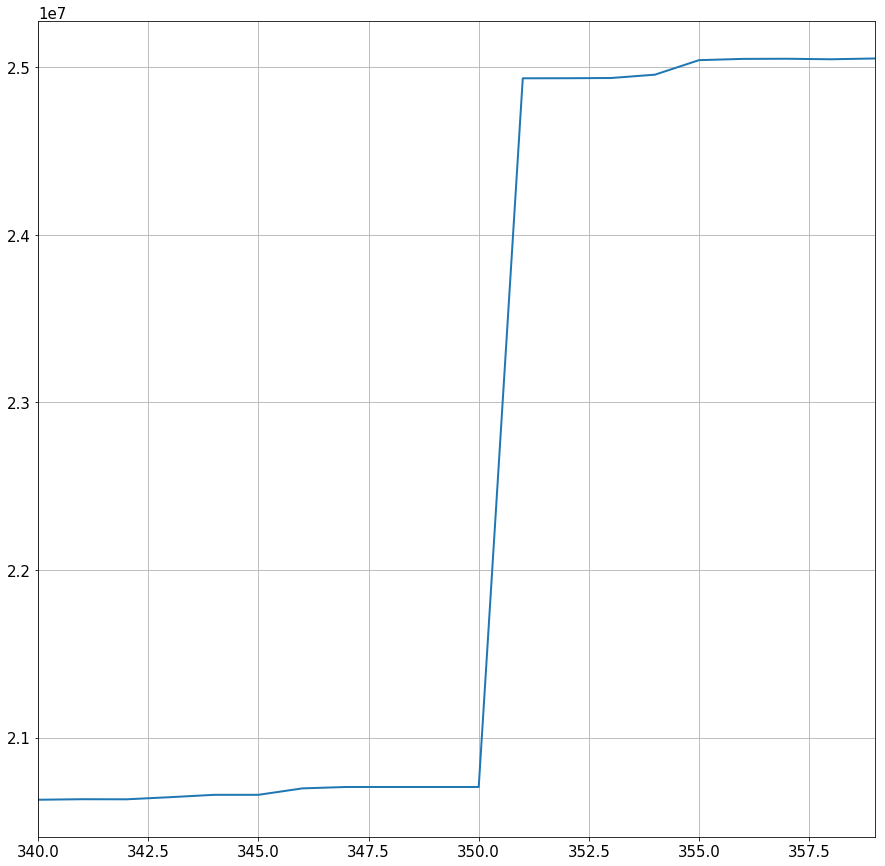

In [877]:
kospi_noBD.iloc[340:360,4].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBD427828>,
      dtype=object)

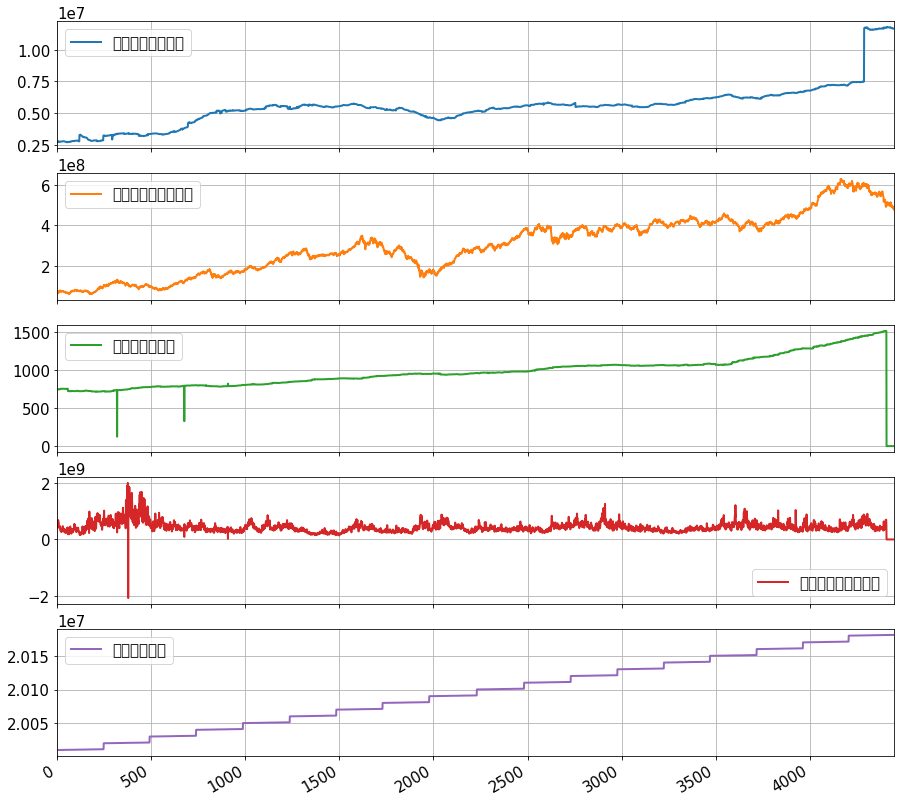

In [986]:
# 외국인보유주식수 / 외국인보유시가총액 / 신용거래종목수 / 신용가능종목거래량 / 신용자료일자

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot3.plot(subplots = True)

#### 신용거래종목수 / 신용가능종목거래량 이상치 처리하기

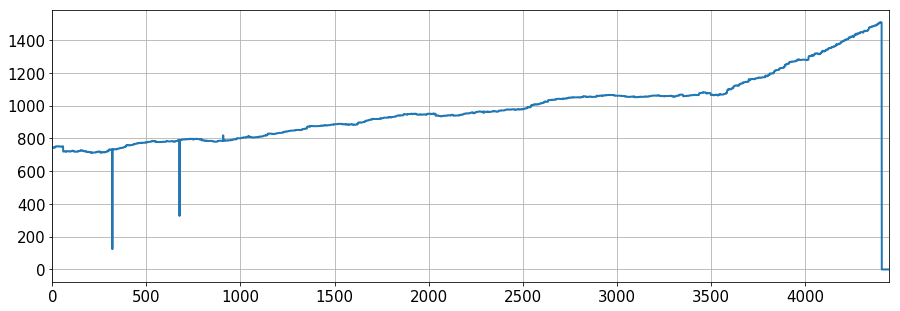

In [991]:
plb.rcParams["figure.figsize"] = (15,5)
kospi['신용거래종목수'].plot()

In [995]:
# 400 이하의 이상치
kospi[kospi['신용거래종목수']<400].iloc[:,:22] # 319 2002-04-22 # 676 2003-10-06 # 실제값 없음

kospi.iloc[319,13] = 0
kospi.iloc[676,13] = 0

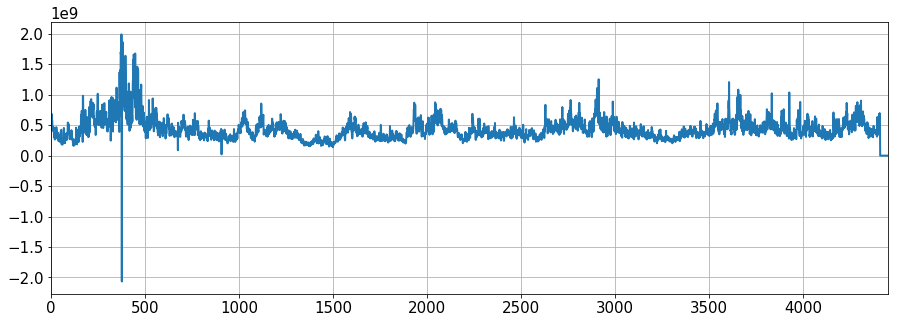

In [996]:
plb.rcParams["figure.figsize"] = (15,5)
kospi['신용가능종목거래량'].plot()

In [998]:
# 400 이하의 이상치
kospi[kospi['신용가능종목거래량']<0].iloc[:,:22] # 378 2002-07-19

kospi.iloc[378,14] = 0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DC1A07A20>,
      dtype=object)

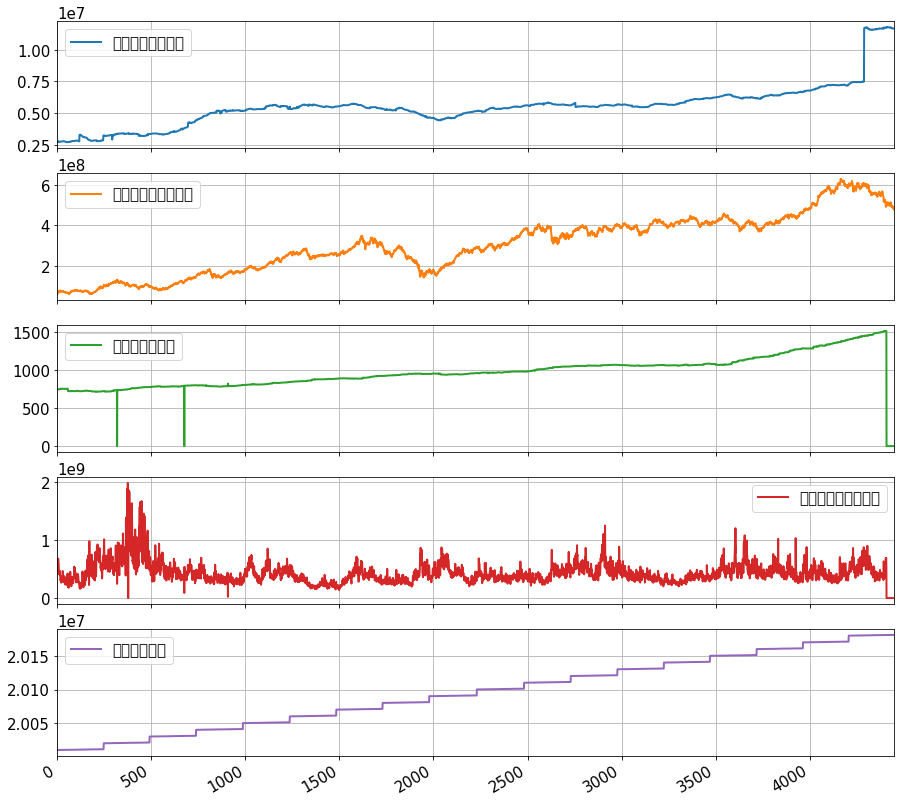

In [1001]:
# 처리 결과 확인하기
plb.rcParams["figure.figsize"] = (15,15)
kospi_plot3.plot(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBE947D30>,
      dtype=object)

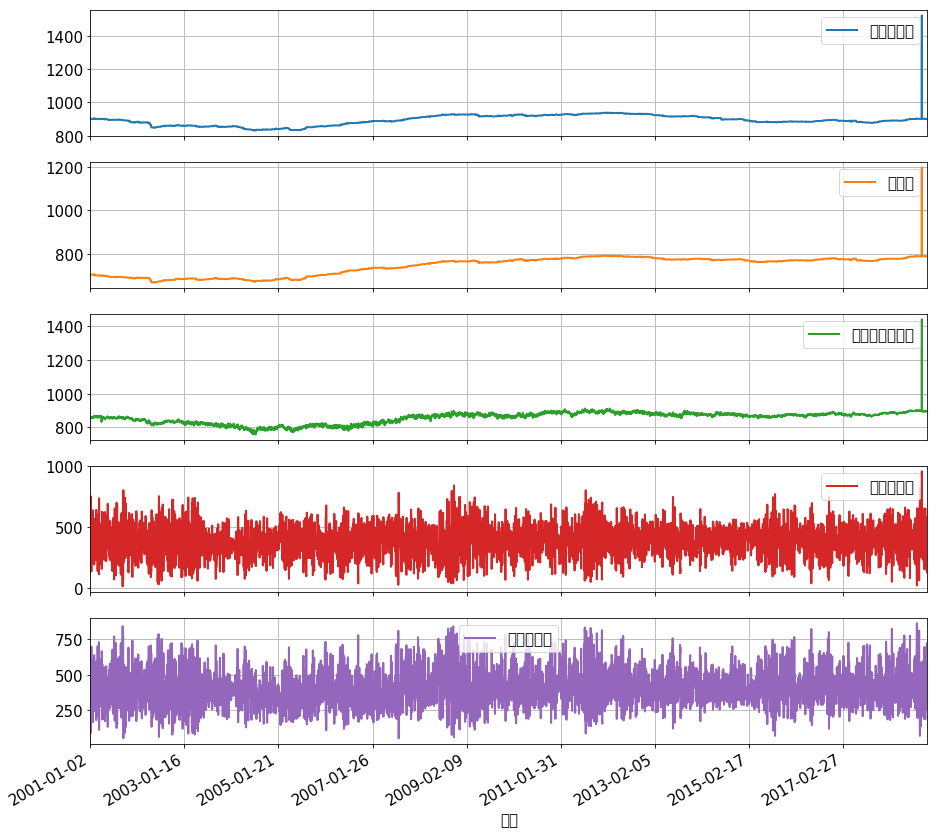

In [987]:
# 전체종목수 / 회사수 / 거래형성종목수 / 상승종목수 / 하락종목수

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot4.plot(subplots = True,x = '날짜')

> 전체종목수 / 회사수 / 거래형성종목수 이상치 확인

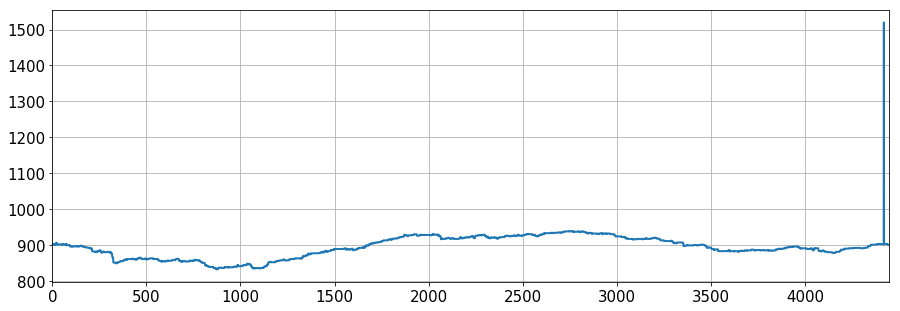

In [1003]:
# 전체종목수
plb.rcParams["figure.figsize"] = (15,5)
kospi['전체종목수'].plot()

In [1007]:
# 이상치 위치 찾아내기
kospi[kospi['전체종목수']>1200].iloc[:,15:20] # 4419
kospi.iloc[4419,0]

'2018-11-16'

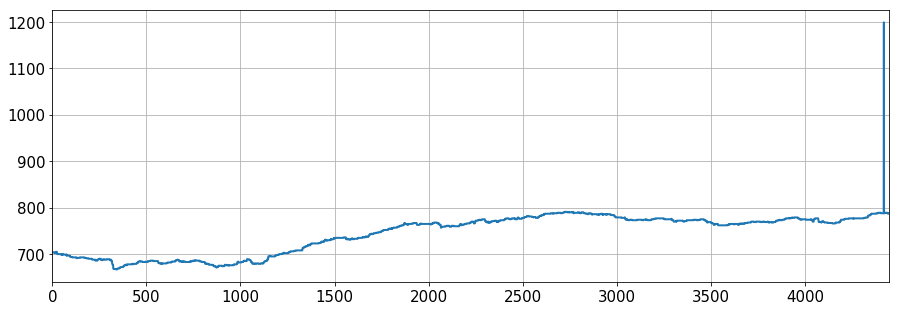

In [1004]:
# 회사수
plb.rcParams["figure.figsize"] = (15,5)
kospi['회사수'].plot()

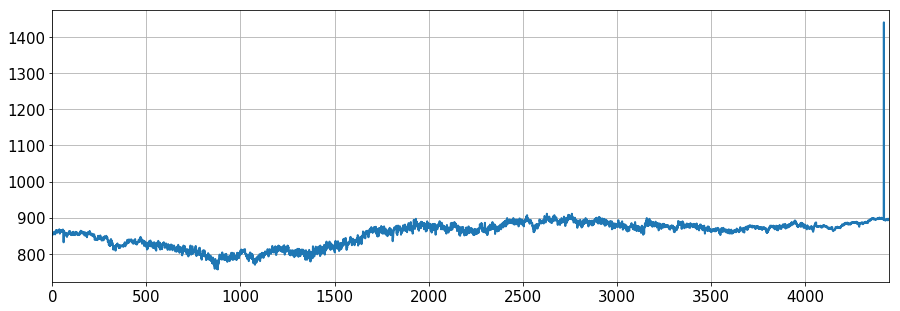

In [1005]:
# 거래형성종목수
plb.rcParams["figure.figsize"] = (15,5)
kospi['거래형성종목수'].plot()

> 2018년 11월 16일 전체종목수 / 회사수 / 거래형성종목수가 갑자기 1000 이상으로 치솟는 현상 발생. 이상치로 처리하려 하였으나 실제값이라고 판단, 이상치 처리를 안하기로 결정

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBE91BE10>,
      dtype=object)

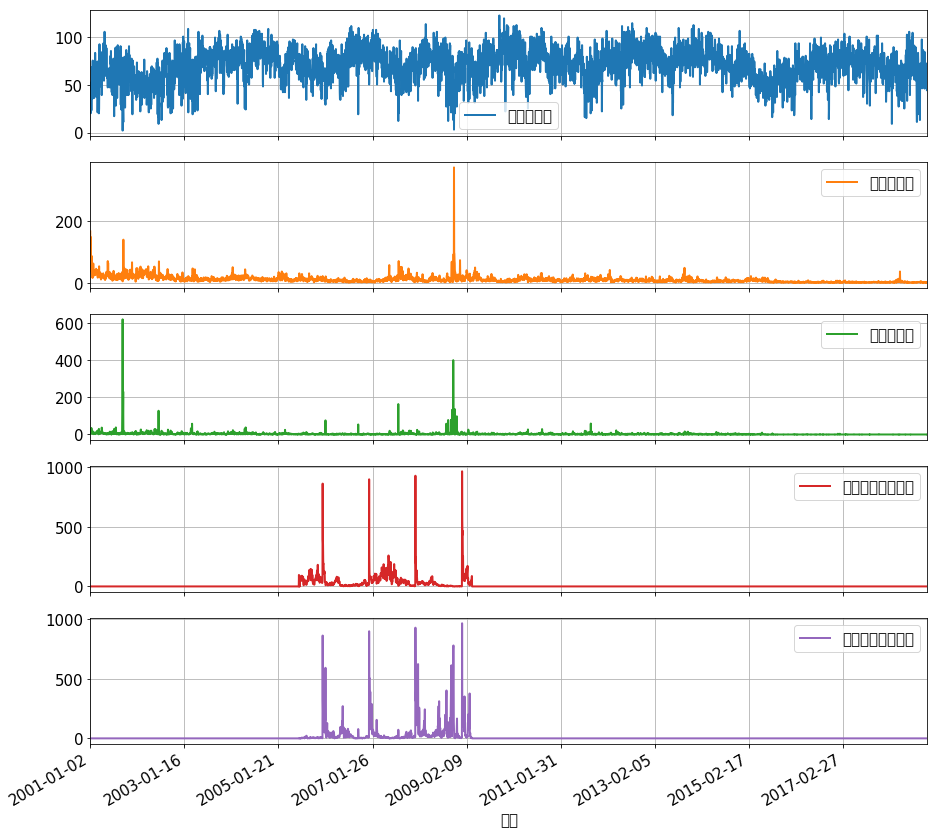

In [988]:
# 보합종목수 / 상한종목수 / 하한종목수 / 연중최고가종목수 / 연중최저가종목수 

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot5.plot(subplots = True,x = '날짜')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DBE8E3EB8>,
      dtype=object)

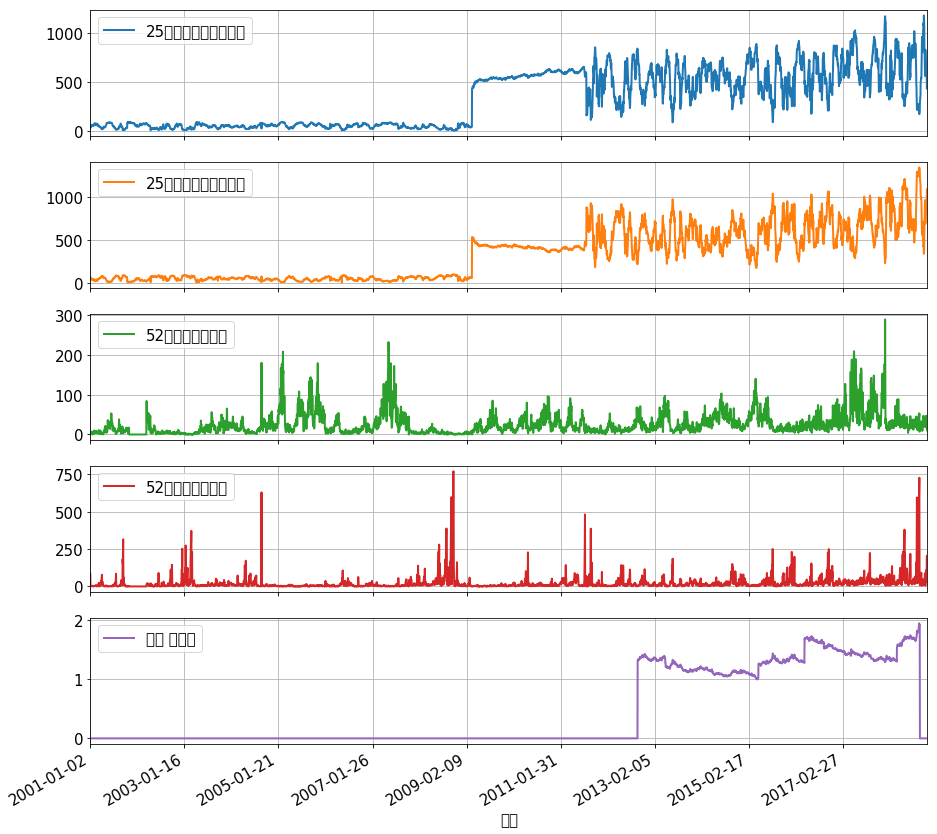

In [989]:
# 25일이평상회종목건수 / 25일이평하회종목건수 / 52주신고가종목수 / 52주신저가종목수 / 배당 수익율

plb.rcParams["figure.figsize"] = (15,15)
kospi_plot6.plot(subplots = True,x = '날짜')

In [1008]:
### 배당 수익율, 연중최고가종목수, 연중최저가종목수, 지수시가, 지수고가, 지수저가, Y를 제외한 VAR 결측치 처리 결과 내보내기
kospi_noBD = kospi.drop(['연중최고가종목수','연중최저가종목수','배당 수익율'],axis = 1)
kospi_noBD = kospi_noBD.drop(['지수시가','지수고가','지수저가','Y'], axis = 1)

kospi_noBD_VAR = fill_na_VAR(kospi_noBD)

kospi_noBD_VAR.to_csv('kospi_noBD_final.csv',index = False, encoding = 'euc-kr') # 이상치 처리 ver.